# Deep Learning vs Random Forest Regression

In [2]:
from fastai import *          # Quick accesss to most common functionality
from fastai.tabular import *  # Quick accesss to tabular functionality
# Access to example data provided with fastai

We will compare the performance of a deep learning model and a random forest regression model used on tabular data. The data comes from a Kaggle competition called [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). It's been downloaded, unzipped and placed in a holder called Houses.

Tabular data should be in a Pandas `DataFrame`.

In [3]:
path = Path('data/Houses')
path.ls()

[PosixPath('data/Houses/train.csv'), PosixPath('data/Houses/models')]

In [4]:
df = pd.read_csv(path/'train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

Our data set contains 81 columns or headings and 1460 samples. A description of them is as follows:

    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale

## Deep Learning Model

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [19]:
df.Id = df.Id.astype('object') # Turning this numerical column into an object

The ID column is set as a categorical variable. All other numerical variables are set as continuous.

In [34]:
# Defining the variables for the model
cat_names = [] # categorical variables
cont_names = [] # continuous variables
for label in df:
    if label == 'SalePrice':
        continue
    if df[label].dtype != object:
        cont_names.append(label)
    else:
        cat_names.append(label) # everything else is a categorical column
        
dep_var = 'SalePrice' # dependent variable

In [35]:
len(cat_names)

44

In [36]:
len(cont_names)

36

In [37]:
# Data preprocessing. This is like the transforms for computer vision (data augmentation)
procs = [FillMissing, Categorify, Normalize] # all of these are done to the train, validation and test sets
# Categorify takes categorical values and turns them into pandas categories

In [38]:
# Splitting into training and vaidaton sets
# Seting the validation set as 20% of the training set
length_df = len(df)
percentage = 0.2
length_valid = int(length_df * percentage)

# This is the index range for the validation set
valid_idx = range(length_df - length_valid, length_df)
valid_idx

range(1168, 1460)

In [39]:
#list(valid_idx)

In [40]:
df[dep_var].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [114]:
# The dependent variable is set as a float so that fastai can treat it as a regression problem
#df[dep_var] = df[dep_var].astype('float')

In [115]:
#df[dep_var].head()

In [116]:
#classes = list(df['SalePrice'].unique())
#print(classes)

In [41]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(valid_idx)
        #split into training and validation. This is a list of indexes from 1,168 to 1,460
        # so its good to have your validation sets in contiguous groups. If they're map tiles, they're next
        # to each other. If they're time periods or video frames too. 
        # So it's good to split by idx if your data has some kind of structure like that.
                           .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
        # The dependant variable is Sales Price. Since dep_var is an int, fastai assumes you want to do classification.
        # So we tell it that the class of the labels is a list of floats
        # if log=True, it's going to take the logarithm of the dependent variable. We use this for RMSPE problems
                           .databunch())

In [28]:
data.show_batch(rows=5)

Id,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolArea,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,target
560,RL,Pave,#na#,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Gd,Unf,Unf,GasA,Ex,Y,SBrkr,0,0,2,0,2,1,Gd,7,Typ,1,TA,Attchd,Fin,2,TA,TA,Y,0,#na#,#na#,#na#,10,2006,WD,Normal,True,False,False,1.4878,0.0020,-0.6860,1.0533,0.9235,-0.4724,-1.0133,-0.2873,1.8231,0.7646,1.0720,-0.7846,-0.1241,0.1084,1.0195,-0.2474,0.3916,-0.3983,-0.3575,-0.1204,-0.2731,-0.0828,12.363076210021973
40,RL,Pave,#na#,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,Gable,CompShg,AsbShng,Plywood,None,TA,TA,PConc,#na#,#na#,#na#,#na#,#na#,GasA,TA,N,FuseP,0,0,2,0,2,2,Fa,6,Typ,0,#na#,#na#,#na#,0,#na#,#na#,N,0,#na#,#na#,#na#,6,2008,WD,AdjLand,False,False,True,0.7819,-0.2326,-0.4197,-0.5493,-1.4627,-0.5720,-1.0133,-0.2873,-1.2752,-2.5137,-0.0116,-0.7846,-0.1241,-0.6910,0.0590,-2.2395,-0.7655,-0.7034,-0.3575,-0.1204,-0.2731,-0.0828,11.314474105834961
884,RL,Pave,#na#,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,2.5Fin,4,5,Gable,CompShg,Wd Sdng,Wd Sdng,None,Gd,TA,PConc,TA,Fa,No,Unf,Unf,GasA,TA,N,SBrkr,1,0,1,0,5,1,TA,10,Typ,0,#na#,Detchd,Unf,1,TA,Gd,Y,0,#na#,#na#,#na#,3,2006,WD,Normal,False,False,False,0.4290,-0.4673,-0.4043,-1.9849,-1.7062,-0.5720,-1.0133,-0.2873,0.5175,-0.6168,-0.5413,1.0531,9.3199,1.4369,0.7689,-0.1525,-0.7655,2.1649,-0.3575,-0.1204,-0.2731,-0.0828,11.682668685913086
1128,RL,Pave,#na#,IR3,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,Hip,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,Fin,3,TA,TA,Y,0,#na#,#na#,#na#,11,2007,WD,Family,False,False,False,-0.8651,5.2589,0.3793,1.0867,0.9235,-0.5720,1.9675,-0.2873,-0.7566,1.1368,0.9997,-0.7846,-0.1241,0.0551,1.0612,0.7487,0.3997,-0.1541,-0.3575,-0.1204,-0.2731,-0.0828,12.464583396911621
538,RL,Pave,#na#,IR1,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,TA,Y,SBrkr,0,0,1,0,3,1,TA,5,Typ,0,#na#,Detchd,Unf,2,TA,TA,Y,0,#na#,MnWw,#na#,4,2008,COD,Normal,True,False,False,-0.8651,0.0020,0.2073,0.0183,-0.6348,-0.5720,0.3625,-0.2873,-0.6799,-0.4522,-0.7821,-0.7846,-0.1241,-1.2595,0.0590,0.4925,0.9822,-0.7034,-0.3575,-0.1204,-0.2731,-0.0828,11.619535446166992


The column name "SalesPrice" has been changed to "target" in the [DataBunch](https://docs.fast.ai/basic_data.html#DataBunch)

### Training The Model

There are many rule-of-thumb methods for determining the correct number of neurons to use in the hidden layers, such as the following:

- The number of hidden neurons should be between the size of the input layer and the size of the output layer.
- The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
- The number of hidden neurons should be less than twice the size of the input layer.

These three rules provide a starting point for you to consider. Ultimately, the selection of an architecture for your neural network will come down to trial and error. 

In [42]:
max_log_y = np.log(np.max(df[dep_var])*1.2)
y_range = torch.tensor([0, max_log_y], device=defaults.device)
# the purpose of y_range is to define the range of the sigmoid function in the final output layer.
# since we're taking the log of the y values, we're taking the log of the y_range
# we multiply the max range of the sales columns by 1.2 because we want it to be a little larger than the actual max
# remember that the Sigmoid function asymptotes at the maximum so we want to go a bit over
# so our y_range goes from 0 to a bit over the maximum
# when device = default it uses whichever the current device is whether CPU tensor or CUDA tensor

In [43]:
y_range

tensor([ 0.0000, 13.7168], device='cuda:0')

In [57]:
learn = tabular_learner(data, layers=[200, 100], y_range=y_range, metrics = exp_rmspe)
# layers is where we define our architecture just like how we define restnet34 etc.
# It's the intermediate weight matrix that goes from a 100 activation input to a 50 activation output

In [190]:
doc(tabular_learner)

- Each embedding layer size is (input, embedding size). Each embedding describes the input for each categorical variable.
- Fastai has some defaults that work very well, but when you create a learner, you can pass in an emb_size dictionary if you want. It maps variables names to emb. sizes.
- After the embeddings we have the embedding dropout layer.
- Then we have a batch norm layer with 16 inputs for the continuous variables. Batch norm normalizes a mini-batch of activatons, plus a vector of bias, plus a constant (exponentially weighted moving average) times the activations. The contant and bias vector can easily scale the activations up or down so that the loss isn't as spikey. The constant has an effect on the mean and the standard deviation. The larger the value, the more they vary from mini-batch to mini-batch and the more regularization effect it has.
- Then the layers: linear-relu-batchnorm.
- Then linear-relu-batchnorm again.
- Then the final output layer.

In [49]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(1169, 84)
    (1): Embedding(6, 4)
    (2): Embedding(3, 3)
    (3): Embedding(3, 3)
    (4): Embedding(5, 4)
    (5): Embedding(5, 4)
    (6): Embedding(3, 3)
    (7): Embedding(6, 4)
    (8): Embedding(4, 3)
    (9): Embedding(26, 10)
    (10): Embedding(10, 6)
    (11): Embedding(8, 5)
    (12): Embedding(6, 4)
    (13): Embedding(9, 5)
    (14): Embedding(6, 4)
    (15): Embedding(7, 5)
    (16): Embedding(14, 7)
    (17): Embedding(16, 8)
    (18): Embedding(5, 4)
    (19): Embedding(5, 4)
    (20): Embedding(6, 4)
    (21): Embedding(7, 5)
    (22): Embedding(5, 4)
    (23): Embedding(5, 4)
    (24): Embedding(5, 4)
    (25): Embedding(7, 5)
    (26): Embedding(7, 5)
    (27): Embedding(5, 4)
    (28): Embedding(6, 4)
    (29): Embedding(3, 3)
    (30): Embedding(6, 4)
    (31): Embedding(5, 4)
    (32): Embedding(8, 5)
    (33): Embedding(6, 4)
    (34): Embedding(7, 5)
    (35): Embedding(4, 3)
    (36): Embedding(6, 4)
 

In [52]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


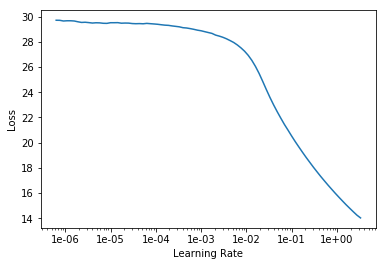

In [53]:
learn.recorder.plot()

In [58]:
learn.fit_one_cycle(50, 1e-2, wd=0.1)

epoch,train_loss,valid_loss,exp_rmspe
1,25.077253,23.233271,0.991373
2,23.809521,19.983213,0.988108
3,21.649076,15.789738,0.979140
4,17.697168,6.776031,0.914141
5,12.334638,0.503485,0.467023
6,8.170464,0.227969,0.746455
7,5.546421,0.215790,0.722189
8,3.803149,0.081803,0.390689
9,2.612310,0.044303,0.245632
10,1.803417,0.050463,0.310205


The RMPSE is defined as Root Mean Square Percentage Error. It is the percentage of the difference between the target variable and the predicted variable.  This error percentage is averaged over all the samples. The lower the number the more accurate the prediction.<br>

The best error rate was 17.4%

## Inference

In [59]:
row = df.iloc[0]

In [60]:
learn.predict(row)

(FloatItem 12.2378511428833, tensor([12.2379]), tensor([12.2379]))

## Random Forest Regression Model

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Data Preprocessing

When building the deep learning model using the fastai library, all preprocessing steps were defined using one line of code: 
- procs = [FillMissing, Categorify, Normalize]

FillMissing fills missing values for numerical variables with the median of the column by default.<br>
Categorify takes categorical variables and turn them into Pandas categories. Then each categorical variable is assigned a numerical code.<br>
Normalize uses the mean and the standard deviation to normalize continuous variables.

In [9]:
df1 = pd.read_csv('train.csv')
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
# Filling missing values with the median for numerical columns
for col in df1.select_dtypes(include=np.number):
    df1[col] = df1[col].fillna(df1[col].median())

In [14]:
df1.select_dtypes(include=np.number).head() # numerical columns

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


### Encoding categorical values

In [16]:
# Selecting the object columns
objcolumns = df1.select_dtypes(include = 'object').columns
objcolumns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [19]:
# Converting them into categories
df1[objcolumns] = df1[objcolumns].astype('category')

In [22]:
# Encoding the category columns into numbers
df1[objcolumns] = df1[objcolumns].apply(lambda x: x.cat.codes)

In [23]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,-1,3,3,0,...,0,-1,-1,-1,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,-1,3,3,0,...,0,-1,-1,-1,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,-1,0,3,0,...,0,-1,-1,-1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,-1,0,3,0,...,0,-1,-1,-1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,-1,0,3,0,...,0,-1,-1,-1,0,12,2008,8,4,250000


It's not necessary to normalize the data for Random Forest.

In [24]:
# Defining X and y to fit the RF model
X = df1.drop('SalePrice', axis = 1)
y = df1['SalePrice']

In [25]:
X.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,65.0,8450,1,-1,3,3,0,...,0,0,-1,-1,-1,0,2,2008,8,4


In [26]:
y.head(1)

0    208500
Name: SalePrice, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [28]:
rfmodel = RandomForestRegressor(n_estimators=200)# n_estimators is the number of trees in the forest

In [29]:
# Fitting the model to the training data
rfmodel.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [32]:
# now we create a vector of predictions using the test data
predictions = rfmodel.predict(X_test)

### Metrics and Evaluation

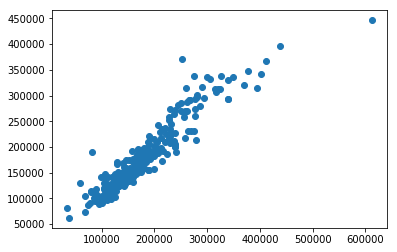

In [41]:
# A plot to see how far from a linear relationship is the actual vs predicted value
plt.scatter(y_test, predictions) 

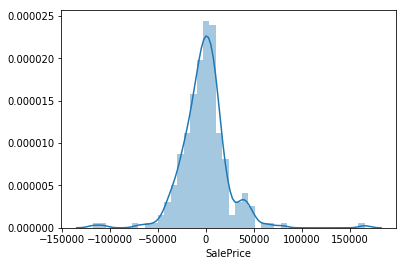

In [45]:
import seaborn as sns
sns.distplot(y_test-predictions) # A histogram plot to see the normal distribuition of the error.

In [46]:
# The R2 score
metrics.explained_variance_score(y_test, predictions)

0.8836109326577617

In [51]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))
RMSE

24689.595486943275

In [52]:
# A scaled RMSE
RMSE/(df1["SalePrice"].max() - df1["SalePrice"].min())

0.03428634285091414

In [55]:
# The RMSPE. The metrics we are comparing to the deep learning model
RMSPE = np.sqrt(np.mean(np.square(((y_test - predictions) / predictions)), axis=0))
RMSPE

0.12686815093714374

The random forest regressor achieved an error score of 12.7%, which is better than the 17.4% score that resulted from using Deep Learning. 